# PREPARING THE DATA

In this project I decided to edit and personalize the data to add more details and practice some functions.

All the changes done are to make the data more interesting for future analysis, like adding countries, naming the promotions, modify the sales format and standarize the columns.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For the future market study
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Reading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/Data_Burger-Marketing-Campaign.csv')
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


I considered that it was a good idea to change the sales in thousand to a full sales value for the future, in case we need it to visualize the ammounts better.

In [3]:
# Standarize the data
df.columns = df.columns.str.lower()
df.columns

# Put the sales column in full quantity (from thousands to total)
df['salesinthousands'] = (df['salesinthousands'] * 1000).astype(int)
df = df.rename(columns={'salesinthousands': 'sales'})
df

,marketid,marketsize,locationid,ageofstore,promotion,week,sales
0,1,Medium,1,4,3,1,33730
1,1,Medium,1,4,3,2,35670
2,1,Medium,1,4,3,3,29030
3,1,Medium,1,4,3,4,39250
4,1,Medium,2,5,2,1,27810
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64340
544,10,Large,920,14,2,1,50200
545,10,Large,920,14,2,2,45750
546,10,Large,920,14,2,3,44290


The data for the market size was collected as Large, Medium and Small and market ids in numbers of 1 to 10.

To help the narrative and future analysis I considered changing the numbers to real name countries on the column.

After this change I will add the countries to visualizations on Tableau.

In [4]:
# Specifing the markets and changing the column to country
marketid_changes = {1: 'USA', 2: 'Canada', 3: 'UK', 4: 'Australia', 5: 'Germany', 6: 'France', 7: 'Spain', 8: 'Mexico', 9: 'Brasil', 10: 'China'}
df['marketid'] = df['marketid'].replace(marketid_changes)
df = df.rename(columns={'marketid': 'country'})
df

,country,marketsize,locationid,ageofstore,promotion,week,sales
0,USA,Medium,1,4,3,1,33730
1,USA,Medium,1,4,3,2,35670
2,USA,Medium,1,4,3,3,29030
3,USA,Medium,1,4,3,4,39250
4,USA,Medium,2,5,2,1,27810
...,...,...,...,...,...,...,...
543,China,Large,919,2,1,4,64340
544,China,Large,920,14,2,1,50200
545,China,Large,920,14,2,2,45750
546,China,Large,920,14,2,3,44290


Same here with the promotions. The data collected it as 1, 2 and 3. For future analysis and insights I decided to add more details on the column.

In [5]:
# Editing the names of the promotions
promotion_changes = {1: 'Query Blue Cheese', 2: 'Python Angus', 3: 'Tableau Pork BBQ'}
df['promotion'] = df['promotion'].replace(promotion_changes)
df

,country,marketsize,locationid,ageofstore,promotion,week,sales
0,USA,Medium,1,4,Tableau Pork BBQ,1,33730
1,USA,Medium,1,4,Tableau Pork BBQ,2,35670
2,USA,Medium,1,4,Tableau Pork BBQ,3,29030
3,USA,Medium,1,4,Tableau Pork BBQ,4,39250
4,USA,Medium,2,5,Python Angus,1,27810
...,...,...,...,...,...,...,...
543,China,Large,919,2,Query Blue Cheese,4,64340
544,China,Large,920,14,Python Angus,1,50200
545,China,Large,920,14,Python Angus,2,45750
546,China,Large,920,14,Python Angus,3,44290


# EDA

Lets take a look on the data now that we have all the changes.

In [6]:
# Checking the NaNs
df.isnull().sum()

country       0
marketsize    0
locationid    0
ageofstore    0
promotion     0
week          0
sales         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     548 non-null    object
 1   marketsize  548 non-null    object
 2   locationid  548 non-null    int64 
 3   ageofstore  548 non-null    int64 
 4   promotion   548 non-null    object
 5   week        548 non-null    int64 
 6   sales       548 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 30.1+ KB


In [8]:
round(df.describe())

,locationid,ageofstore,week,sales
count,548.0,548.0,548.0,548.0
mean,480.0,9.0,2.0,53466.0
std,288.0,7.0,1.0,16755.0
min,1.0,1.0,1.0,17340.0
25%,216.0,4.0,2.0,42545.0
50%,504.0,7.0,2.0,50200.0
75%,708.0,12.0,3.0,60478.0
max,920.0,28.0,4.0,99650.0


In [9]:
# Stores per each market
print(df['marketsize'].value_counts())

marketsize
Medium    320
Large     168
Small      60
Name: count, dtype: int64


In [10]:
# Size market of each country
country_counts = df['country'].value_counts()
unique_countries = df.drop_duplicates(subset=['country'])

for index, row in unique_countries.iterrows():
    country = row['country']
    count = country_counts[country]
    print(f"{country}: {row['marketsize']}: {count}")

USA: Medium: 52
Canada: Small: 24
UK: Large: 88
Australia: Small: 36
Germany: Medium: 60
France: Medium: 60
Spain: Medium: 60
Mexico: Medium: 48
Brasil: Medium: 40
China: Large: 80


Looking at the data we can conclude:

- **Small** markets comprise countries with 1 to 39 stores.
- **Medium** markets encompass countries with 40 to 79 stores.
- **Large** markets consist of countries with 80 or more stores.

In [11]:
# Counting the years that each store opened
print(df['ageofstore'].value_counts().sort_index())

ageofstore
1     80
2     20
3     32
4     44
5     44
6     36
7     40
8     40
9     28
10    24
11    16
12    24
13    20
14    12
15     8
17     4
18     8
19    20
20     4
22    12
23     8
24    12
25     4
27     4
28     4
Name: count, dtype: int64


Now we can take our first look on the two main columns of the data, **promotions** and **sales.**

In [12]:
round(df.groupby('promotion')["sales"].describe())

,count,mean,std,min,25%,50%,75%,max
promotion,,,,,,,,
Python Angus,188.0,47329.0,15109.0,17340.0,38170.0,45385.0,51745.0,88640.0
Query Blue Cheese,172.0,58099.0,16554.0,30810.0,46352.0,55385.0,63618.0,99650.0
Tableau Pork BBQ,188.0,55364.0,16766.0,22180.0,44198.0,51165.0,61732.0,96480.0


At this first look to the sales and promotions we can see that the **Query Blue Cheese** have the best mean in the sales, but we need to take the consideration that it has the less amount of distribution.

In the other two, the mean its close to each other with the same amount of promotions.

In [13]:
# Number of each promotions
print(df['promotion'].value_counts())

promotion
Tableau Pork BBQ     188
Python Angus         188
Query Blue Cheese    172
Name: count, dtype: int64


The Query Blue Chesse had less performance compared with the rest of the promotions. Anyways the ammount its too low to take it in consideration.

# PLOTS

I started to explore the data in question with some plots, to familiarize with it and start reaching some first insights.

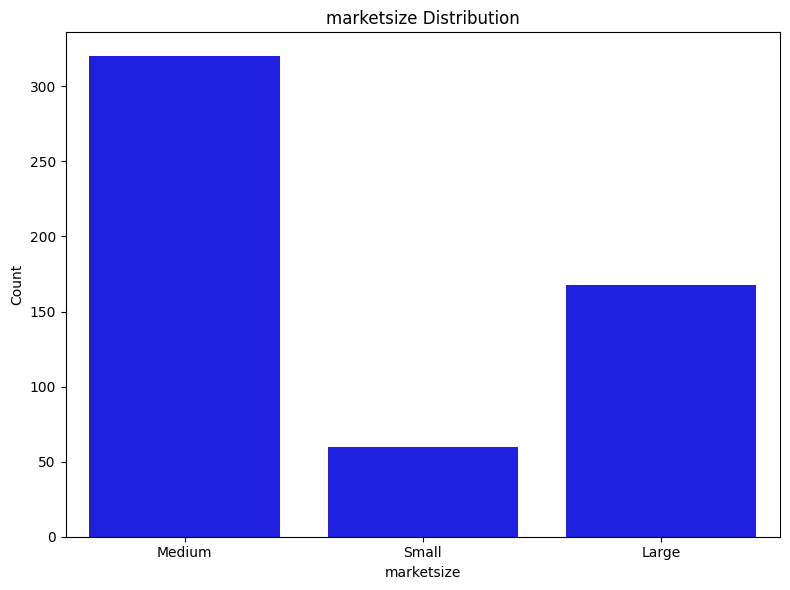

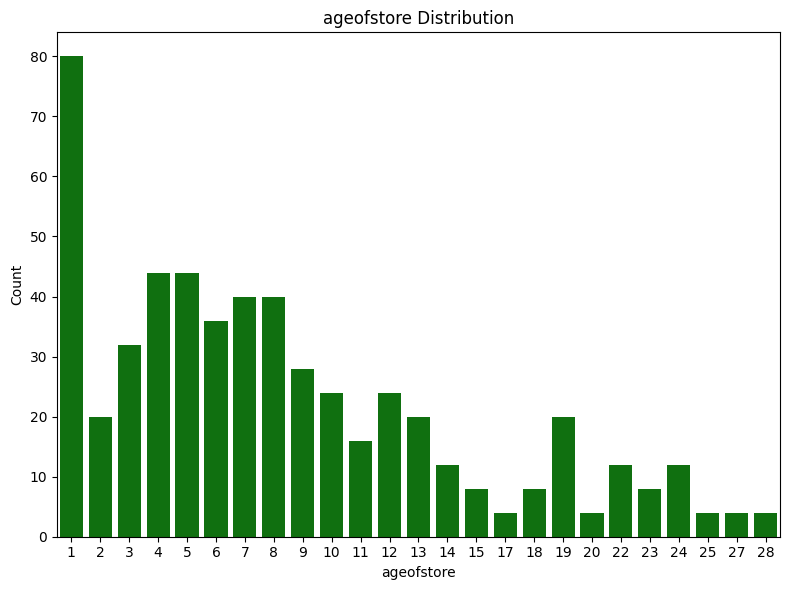

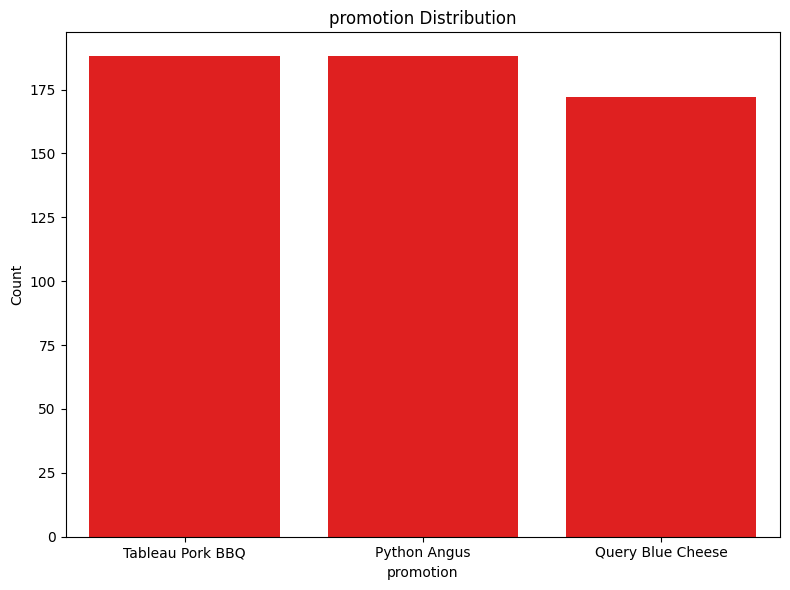

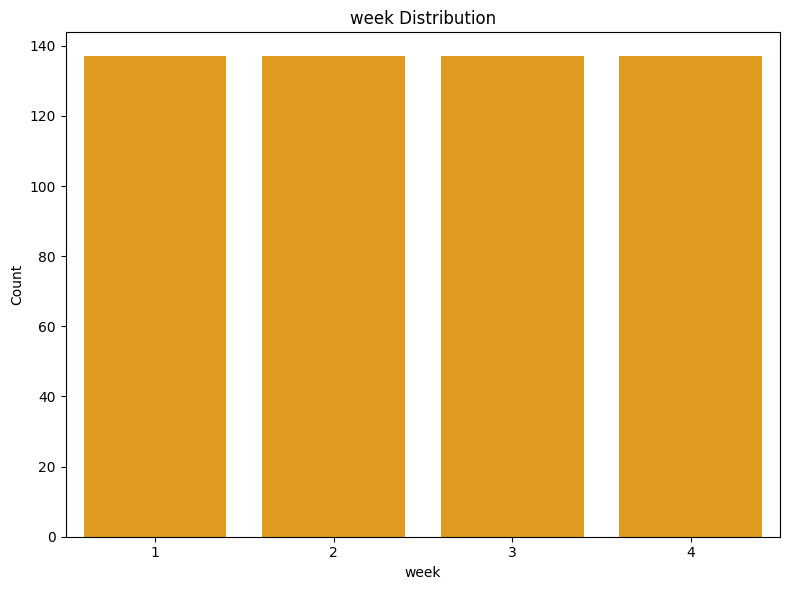

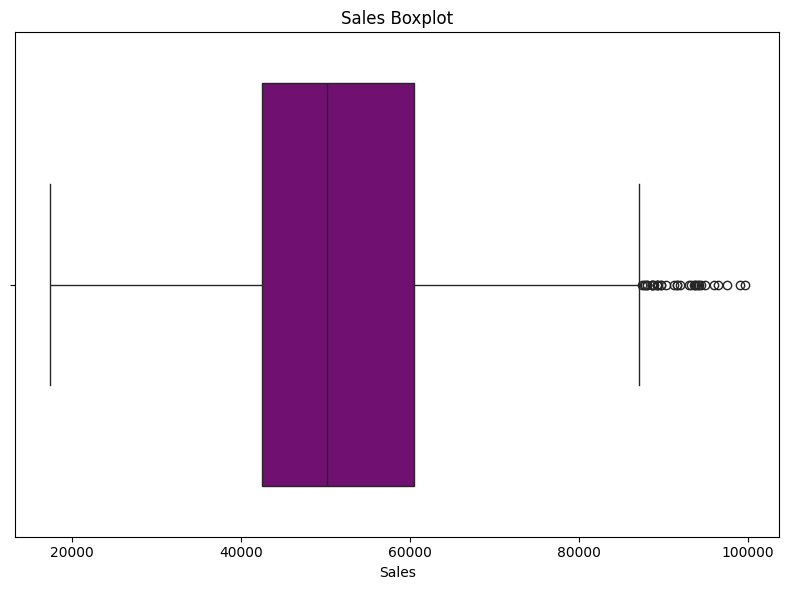

In [14]:
# Plots of the distribution on the main columns
columns = ['marketsize', 'ageofstore', 'promotion', 'week']
colors = ['blue', 'green', 'red', 'orange']
for column, color in zip(columns, colors):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, color=color)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Boxplot of the sales column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sales', color='purple')
plt.title('Sales Boxplot')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

Points we can conclude after the plots:

- The biggest market its actually the Medium, with more stores.
- The last year was the highest one on opening stores.
- The count on the promotion distributions are not equal, Query Blue Cheese has less distribution than the other two.

<ipython-input-15-b9db81c8f177>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='promotion', y='sales', data=df, ax=ax[3], palette=custom_palette)


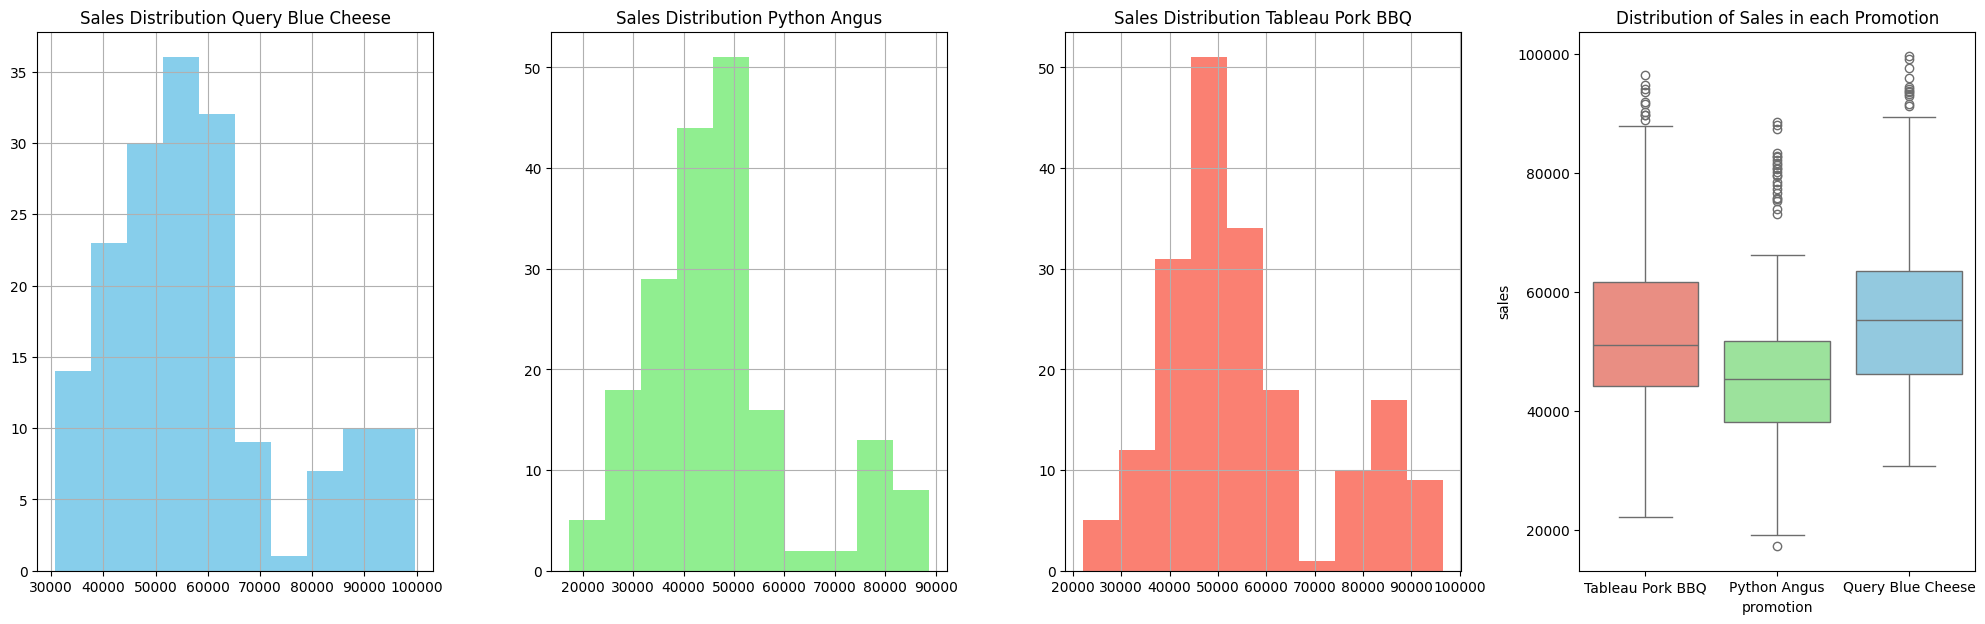

In [15]:
# Sales distribution of each promotion
custom_palette = {'Query Blue Cheese': 'skyblue', 'Python Angus': 'lightgreen', 'Tableau Pork BBQ': 'salmon'}
f, ax = plt.subplots(1, 4, figsize=(25, 7))

df[df.promotion == 'Query Blue Cheese'].hist('sales', ax=ax[0], color=custom_palette['Query Blue Cheese'])
ax[0].set_title('Sales Distribution Query Blue Cheese')

df[df.promotion == 'Python Angus'].hist('sales', ax=ax[1], color=custom_palette['Python Angus'])
ax[1].set_title('Sales Distribution Python Angus')

df[df.promotion == 'Tableau Pork BBQ'].hist('sales', ax=ax[2], color=custom_palette['Tableau Pork BBQ'])
ax[2].set_title('Sales Distribution Tableau Pork BBQ')

# Boxplot of each promotion
sns.boxplot(x='promotion', y='sales', data=df, ax=ax[3], palette=custom_palette)
ax[3].set_title('Distribution of Sales in each Promotion')

plt.show()

# PROMOTIONS COMPARISON

In [16]:
# Divide the promotions in 3 groups
group_a = df[df['promotion'] == 'Tableau Pork BBQ']
group_b = df[df['promotion'] == 'Python Angus']
group_c = df[df['promotion'] == 'Query Blue Cheese']

# Prepare the ANOVA testing
f_statistic, p_value = f_oneway(group_a['sales'], group_b['sales'], group_c['sales'])

print("F Estadistic:", round(f_statistic, 3))
print("P Value:", p_value)

# Interpretate the results
if p_value < 0.05:
    print("There are significant differences between at least two groups.")
else:
    print("There are not significant differences between at least two groups")

F Estadistic: 21.953
P Value: 6.766100696713364e-10
There are significant differences between at least two groups.


Given that the p-value is significantly less than 0.05, we can reject the null hypothesis that there are no significant differences between the groups. This suggests that at least one of the groups differs significantly in terms of sales compared to the other groups.

In [17]:
# Combine all the data
all_sales = df['sales']

# Combine all the promotions
all_promotions = df['promotion']

# Prepare the Tukey test with the two key values
tukey_results = pairwise_tukeyhsd(all_sales, all_promotions)
print(tukey_results)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1            group2       meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------------
     Python Angus Query Blue Cheese 10769.5909    0.0  6765.3442 14773.8377   True
     Python Angus  Tableau Pork BBQ  8035.0479    0.0  4120.7957 11949.3001   True
Query Blue Cheese  Tableau Pork BBQ  -2734.543 0.2444 -6738.7898  1269.7037  False
----------------------------------------------------------------------------------


After this results we can conclude:

- The average difference between sales of **Python Angus** and **Query Blue Cheese** is significantly different, with **Python Angus** having significantly higher sales than **Query Blue Cheese**.
  
- There is also a significant difference between sales of **Python Angus** and **Tableau Pork BBQ**, with **Python Angus** having significantly higher sales than **Tableau Pork BBQ**.

- However, there is no significant difference in sales between **Query Blue Cheese** and **Tableau Pork BBQ**.

These results suggest that the promotions **Python Angus** and **Query Blue Cheese** have significantly different performance in terms of sales, with **Python Angus** having significantly higher sales than **Query Blue Cheese**. Additionally, **Python Angus** also has significantly better performance compared to **Tableau Pork BBQ**. On the other hand, there is no significant difference in sales between **Query Blue Cheese** and **Tableau Pork BBQ**.

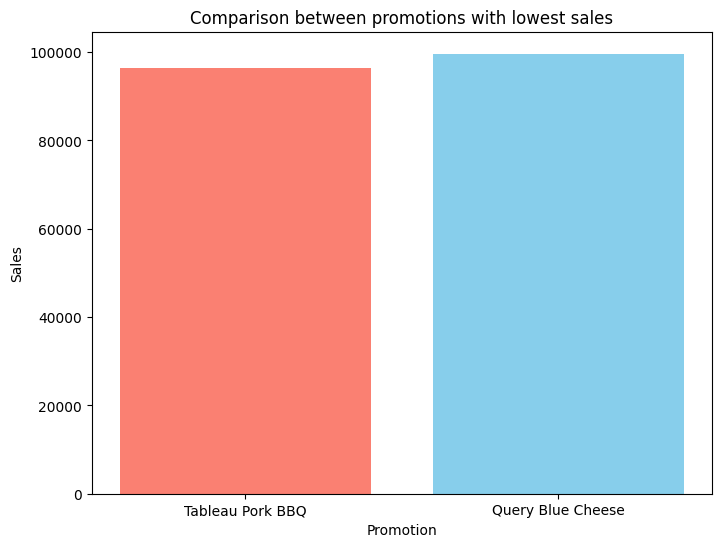

,count,mean,std,min,25%,50%,75%,max
promotion,,,,,,,,
Query Blue Cheese,172.0,58099.005814,16553.790900,30810.0,46352.5,55385.0,63617.5,99650.0
Tableau Pork BBQ,188.0,55364.462766,16766.238064,22180.0,44197.5,51165.0,61732.5,96480.0


In [18]:
# Filtering the data for the two promotions with least sales
least_sales_promotions = ['Query Blue Cheese', 'Tableau Pork BBQ']
filtered_data = df[df['promotion'].isin(least_sales_promotions)]

# Plotting the data
plt.figure(figsize=(8, 6))
colors = {'Query Blue Cheese': 'skyblue', 'Tableau Pork BBQ': 'salmon'}  # Definir colores para cada promoción
plt.bar(filtered_data['promotion'], filtered_data['sales'], color=[colors[p] for p in filtered_data['promotion']])
plt.title('Comparison between promotions with lowest sales')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.show()

# Stadistics of the comparison
stats_2_promos = filtered_data.groupby('promotion')['sales'].describe()
stats_2_promos

From the provided data, we can draw several conclusions about the two promotions with the lowest sales:

- Average Sales: The **Query Blue Cheese** promotion has a higher average sales (approximately 58099.01) compared to the **Tableau Pork BBQ** promotion (approximately 55364.46).

- Sales Dispersion: Both promotions have similar dispersion in their sales, as reflected in the standard deviation. This means that sales tend to vary in a similar range around the mean for both promotions.

- Sales Range: The **Query Blue Cheese** promotion has higher sales in both the 25th and 75th percentiles compared to **Tableau Pork BBQ**. This suggests that sales tend to be higher for **Query Blue Cheese** in most cases, although there are some exceptional observations of higher sales for **Tableau Pork BBQ**.

# MARKET ANALYSIS


One of the biggest points to take in consideration for a decission its to know what its the relation between the sales and the countries.

Some of this insights can help to make a business move depending on sales, promotions and countries to improve the benefits.

In [19]:
# Showing the sales of each promotion in different countries
sales_comparison = df.groupby(['country', 'promotion'])['sales'].sum().reset_index()
print(sales_comparison)

      country          promotion    sales
0   Australia       Python Angus   812970
1   Australia  Query Blue Cheese   940850
2   Australia   Tableau Pork BBQ   208470
3      Brasil       Python Angus   399860
4      Brasil  Query Blue Cheese   680020
5      Brasil   Tableau Pork BBQ  1037750
6      Canada  Query Blue Cheese   262400
7      Canada   Tableau Pork BBQ  1219870
8       China       Python Angus  1950400
9       China  Query Blue Cheese  1703090
10      China   Tableau Pork BBQ   648610
11     France       Python Angus   782310
12     France  Query Blue Cheese   813299
13     France   Tableau Pork BBQ   588239
14    Germany       Python Angus  1469370
15    Germany  Query Blue Cheese   444130
16    Germany   Tableau Pork BBQ  1016780
17     Mexico       Python Angus   339980
18     Mexico  Query Blue Cheese  1022800
19     Mexico   Tableau Pork BBQ   986960
20      Spain       Python Angus   629790
21      Spain  Query Blue Cheese   801940
22      Spain   Tableau Pork BBQ  

<Figure size 1000x600 with 0 Axes>

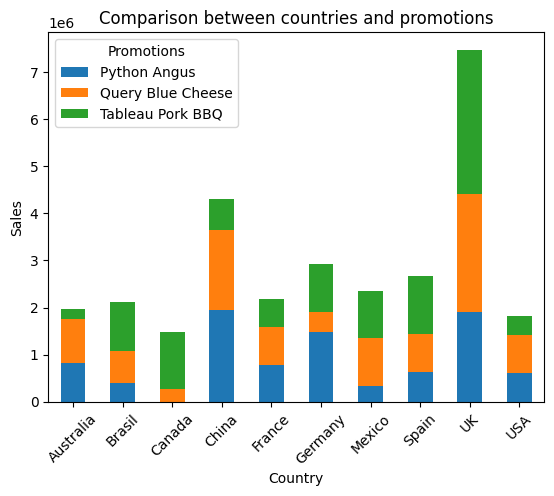

In [20]:
# Plotting the comparison between the sales and the countries
plt.figure(figsize=(10, 6))
sales_comparison.pivot(index='country', columns='promotion', values='sales').plot(kind='bar', stacked=True)
plt.title('Comparison between countries and promotions')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Promotions')
plt.show()

With this glipse to the data we can conclude:

- The biggest markets are **China** and **UK**, being **UK** the biggest market for the company.
- **Canada** its not promoting the **Query Blue Cheese** for some reason. This is very important to keep in mind.
- **USA** is one of the smallest markets for the company.
- **North America** (Canada and USA) its one of the smallest markets right now, with great potential of growth.
- The **Python Angus**, being the best seller promotion, dont have the same impact in **Australia**.

In [22]:
# Correlation matrix of the numerical values
correlation_matrix = df.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'USA'

We can check the correlation between the size of the market, the sales, the age of the store and weeks.

To determine this, a correlation matrix its the best tool to have a new perspective of the markets.

The conclusion that gave us are some distributions on plots and the only data usefull its the relation between the **sales** and **weeks** (-1.098363) showing that the sales decreases when the weeks goes by during this month.

Probably because the decrease in the interest of the clients after the release of the promotions or try it once.

In [ ]:
# Distribution of the sales and the age of stores
plt.bar(df['ageofstore'], df['sales'])
plt.xlabel('Age of store')
plt.ylabel('Sales')
plt.title('Relation between age of stores and sales')
plt.show()

In [ ]:
# Creating a pie chart
market_size_totals = df.groupby('marketsize')['ageofstore'].sum()

plt.figure(figsize=(8, 6))
plt.pie(market_size_totals, labels=market_size_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution between age of stores and markets size')
plt.ylabel('')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sales_threshold = df['sales'].quantile(0.25)

sns.lineplot(data=df, x='ageofstore', y='sales', hue='country')
plt.axhline(y=sales_threshold, color='r', linestyle='--', label='Low sales')

plt.xlabel('Age of store')
plt.ylabel('Sales')
plt.title('Relation between age of store and sales by country')
plt.legend(title='Country')
plt.show()

In this relation we can see that below the quantile 25 two countries appear, **France** and **USA**.

- **France** for some reason has a low sales in the stores between 10 and 15 years open.
- **USA** regarding being one of the newest markets, keep struggling with the sales in stores with 10 years open.

Also, **Spain** has a low sales in stores between 5 and 10 years. Maybe the conclusion we have is that in that stores something its happening. The exact location and distribution on the stores are variables that we dont have, but its a nice insight to keep in consideration.

# EXPORT

In [24]:
#Exporting the edited data

df.to_csv('Data_Burger_V3.csv', index=False)

from google.colab import files

files.download('Data_Burger_V3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>